# Self-Paced Learning 4
## Kode Learning

In [3]:
my_name = "Firya"
hello_statement = "Hello,"+ my_name
print(hello_statement)

Hello,Firya


In [5]:
x = 10
for j in range(1, 5) :
    x = x+ j
    print("j = {0} x={1}". format(j, x))

j = 1 x=11
j = 2 x=13
j = 3 x=16
j = 4 x=20


## Mempersiapkan Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading dan Review Data

In [8]:
df = pd.read_csv("bankloan.csv")

In [9]:
df.shape

(700, 9)

In [10]:
df.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [11]:
df.tail(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0
699,37,1,12,14,44,14.7,2.994684,3.473316,0


In [13]:
# data kosong
df.isnull().values.any()

False

In [21]:
# korelasi helper
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

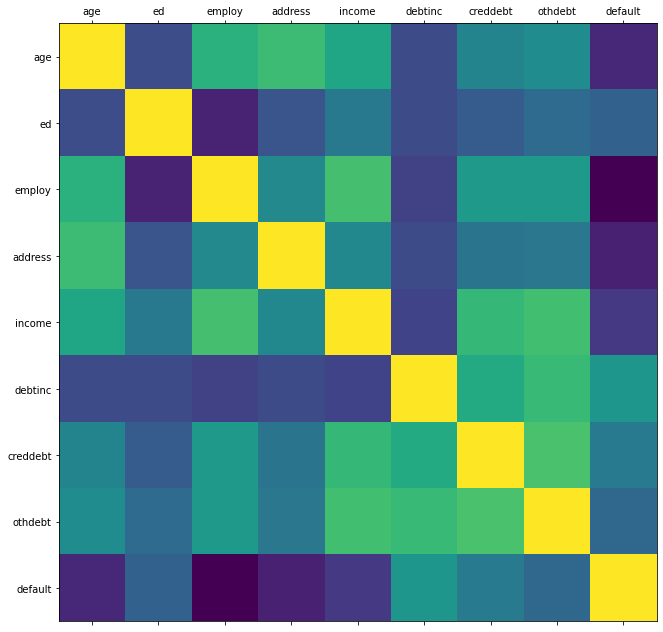

In [22]:
plot_corr(df)

In [23]:
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


In [24]:
df.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


## Merapikan Data

In [26]:
# cek tipe data : pastikan data numerik
## ubah boolean ke integer
default_map = {1:1, 0:0}
df['default'] = df['default'].map(default_map)

In [27]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [28]:
# cek lagi datanya apakah ada null value
df.isnull().values.any()

False

In [31]:
num_obs = len(df)
num_1 = len(df.loc[df['default']==1])
num_0 = len(df.loc[df['default']==0])
print("Jumlah Default : {0}({1:2.2f}%)".format(num_1, (num_1/num_obs)*100))
print("Jumlah Bukan Default : {0}({1:2.2f}%)".format(num_0, (num_0/num_obs)*100))

Jumlah Default : 183(26.14%)
Jumlah Bukan Default : 517(73.86%)


## Training dengan Python

In [40]:
# splitting data
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'ed', 'employ', 'address', 'income','debtinc', 'creddebt', 'othdebt' ]
predicted_class_names = ['default']

X = df[feature_col_names].values
y = df[predi cted_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=split_test_size, random_state=42)

In [41]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index))*100))

70.00% ada pada training set
30.00% ada pada test set


In [57]:
print("{0:0.2f}% ada pada training set".format(len(df.loc[df['default']==1]), (len(df.loc[df['default']==1])/len(df.index))*100))
print("{0:0.2f}% ada pada test set".format(len(df.loc[df['default']==0]), (len(df.loc[df['default']==0])/len(df.index))*100))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]),(len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]),(len(y_train[y_train[:] == 0])/len(y_train)*100.0)))
print("")
print("Test True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Test False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

183.00% ada pada training set
517.00% ada pada test set

Training True : 134 (27.35%)
Training False : 356 (72.65%)

Test True : 49 (23.33%)
Test False : 161 (76.67%)


In [58]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [63]:
print("# rows indataframe {0}".format(len(df)))
print("# rows missing age: {0}".format(len(df.loc[df['age']== 0])))
print("# rows missing ed: {0}".format(len(df.loc[df['ed']== 0])))
print("# rows missing employ: {0}".format(len(df.loc[df['employ']== 0])))
print("# rows missing income: {0}".format(len(df.loc[df['income']== 0])))
print("# rows missing debtinc: {0}".format(len(df.loc[df['debtinc']== 0])))
print("# rows missing creddebt: {0}".format(len(df.loc[df['creddebt']== 0])))
print("# rows missing othdebt: {0}".format(len(df.loc[df['othdebt']== 0])))


# rows indataframe 700
# rows missing age: 0
# rows missing ed: 0
# rows missing employ: 62
# rows missing income: 0
# rows missing debtinc: 0
# rows missing creddebt: 0
# rows missing othdebt: 0


In [66]:
# data 0 :
# 1. data ignore
# 2. data drop
# 3. data replace : contoh dengan mean inputting
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [67]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [69]:
# train naive bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Uji Akurasi

In [73]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7327


In [81]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics

print("nb_predict_test",nb_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0]
y_test [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]


In [80]:
print("Confussion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confussion Matrix
[[147  14]
 [ 30  19]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       161
           1       0.58      0.39      0.46        49

    accuracy                           0.79       210
   macro avg       0.70      0.65      0.67       210
weighted avg       0.77      0.79      0.77       210



## Peningkatan Performa
### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [86]:
rf_predict_train = rf_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [87]:
rf_predict_test = rf_model.predict(X_test)
from sklearn import metrics

print("rf_predict_test",rf_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

rf_predict_test [0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0]
y_test [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]


In [88]:
print("Confussion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confussion Matrix
[[150  11]
 [ 31  18]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       161
           1       0.62      0.37      0.46        49

    accuracy                           0.80       210
   macro avg       0.72      0.65      0.67       210
weighted avg       0.78      0.80      0.78       210



### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.8524
[[153   8]
 [ 23  26]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       161
           1       0.76      0.53      0.63        49

    accuracy                           0.85       210
   macro avg       0.82      0.74      0.77       210
weighted avg       0.84      0.85      0.84       210



1st max value of 0.755 occured at C=0.600


Text(0, 0.5, 'recall score')

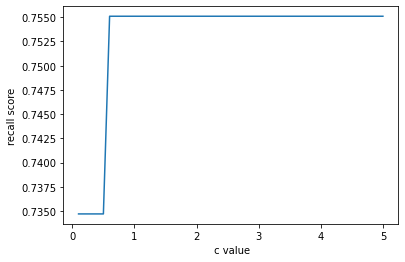

In [103]:
# balance
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []

c_val = c_start
best_recall_score = 0
while(c_val < c_end) :
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, class_weight='balanced', random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score) :
        best_recall_score = recall_score
        best_lr_predict_test =lr_predict_loop_test
    c_val = c_val + c_inc

best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_c_val))

%matplotlib inline
plt.plot(c_values, recall_scores, '-')
plt.xlabel(" c value")
plt.ylabel("recall score")

In [104]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight ='balanced', C=best_score_c_val, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7619
[[123  38]
 [ 12  37]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       161
           1       0.49      0.76      0.60        49

    accuracy                           0.76       210
   macro avg       0.70      0.76      0.71       210
weighted avg       0.81      0.76      0.78       210



## Cross Validation

In [106]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='balace', max_iter=500)
lr_cv_model.fit(X_train,y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balace', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

In [108]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

In [109]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test,lr_cv_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.8381
[[154   7]
 [ 27  22]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       161
           1       0.76      0.45      0.56        49

    accuracy                           0.84       210
   macro avg       0.80      0.70      0.73       210
weighted avg       0.83      0.84      0.82       210



In [116]:
# save 
import joblib

In [117]:
joblib.dump(lr_cv_model, "C:/Users/LENOVO/Class PYTN-KS06-005/Kode-trained-model")

['C:/Users/LENOVO/Class PYTN-KS06-005/Kode-trained-model']

In [118]:
lc_cv_model = joblib.load("C:/Users/LENOVO/Class PYTN-KS06-005/Kode-trained-model")

# Firya Fatin Rahmadanti
PYTN-KS06-005